### Target Customer Identification Using DBSCAN and Detect Outliers

Customer segmentation is crucial for businesses aiming to tailor their marketing strategies and improve customer engagement. This case study focuses on using the DBSCAN (Density-Based Spatial Clustering of Applications with Noise) algorithm for target customer identification. By analyzing customer behaviors based on their annual income and spending scores, we aim to segment the customers into meaningful groups while identifying any outliers

#### Apply all Three algorithms and compare their results

- K_means Clustering
- Hierarchical Clustering
- DBSCAN 

In [434]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mall-customer-dataset/Mall_Customers.csv


In [435]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.decomposition import PCA

import warnings 
warnings.filterwarnings("ignore")

In [436]:
data = pd.read_csv('/kaggle/input/mall-customer-dataset/Mall_Customers.csv')
df = data.copy()

In [437]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [438]:
df.shape

(200, 5)

In [439]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [440]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [441]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Print the count of missing values for each column
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [442]:
# Total missing values in the dataset
total_missing = df.isnull().sum().sum()

print(f"Total Missing Values in the Dataset: {total_missing}")

Total Missing Values in the Dataset: 0


In [443]:
#Loop through each column and print the unique values
for column in df.columns:
    unique_values = df[column].unique()
    count_values  = len(df[column].unique())
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}\n")
    print(f"total count unique values : { count_values}\n")

Column: CustomerID
Unique Values: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200]

total count unique values : 200

Column: Gender
Unique Values: ['Male' 'Female']

total count unique values : 2

Column: Age
Unique Values: [19 21 20 23

In [444]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [445]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [446]:
df['Gender'] = df['Gender'].apply(lambda x:0 if x=='Male' else 1)

In [447]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


In [448]:
df.dtypes

CustomerID                int64
Gender                    int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

In [449]:
df.drop('CustomerID',axis=1,inplace=True)

In [450]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


### Box-Plots

To detect Outliers

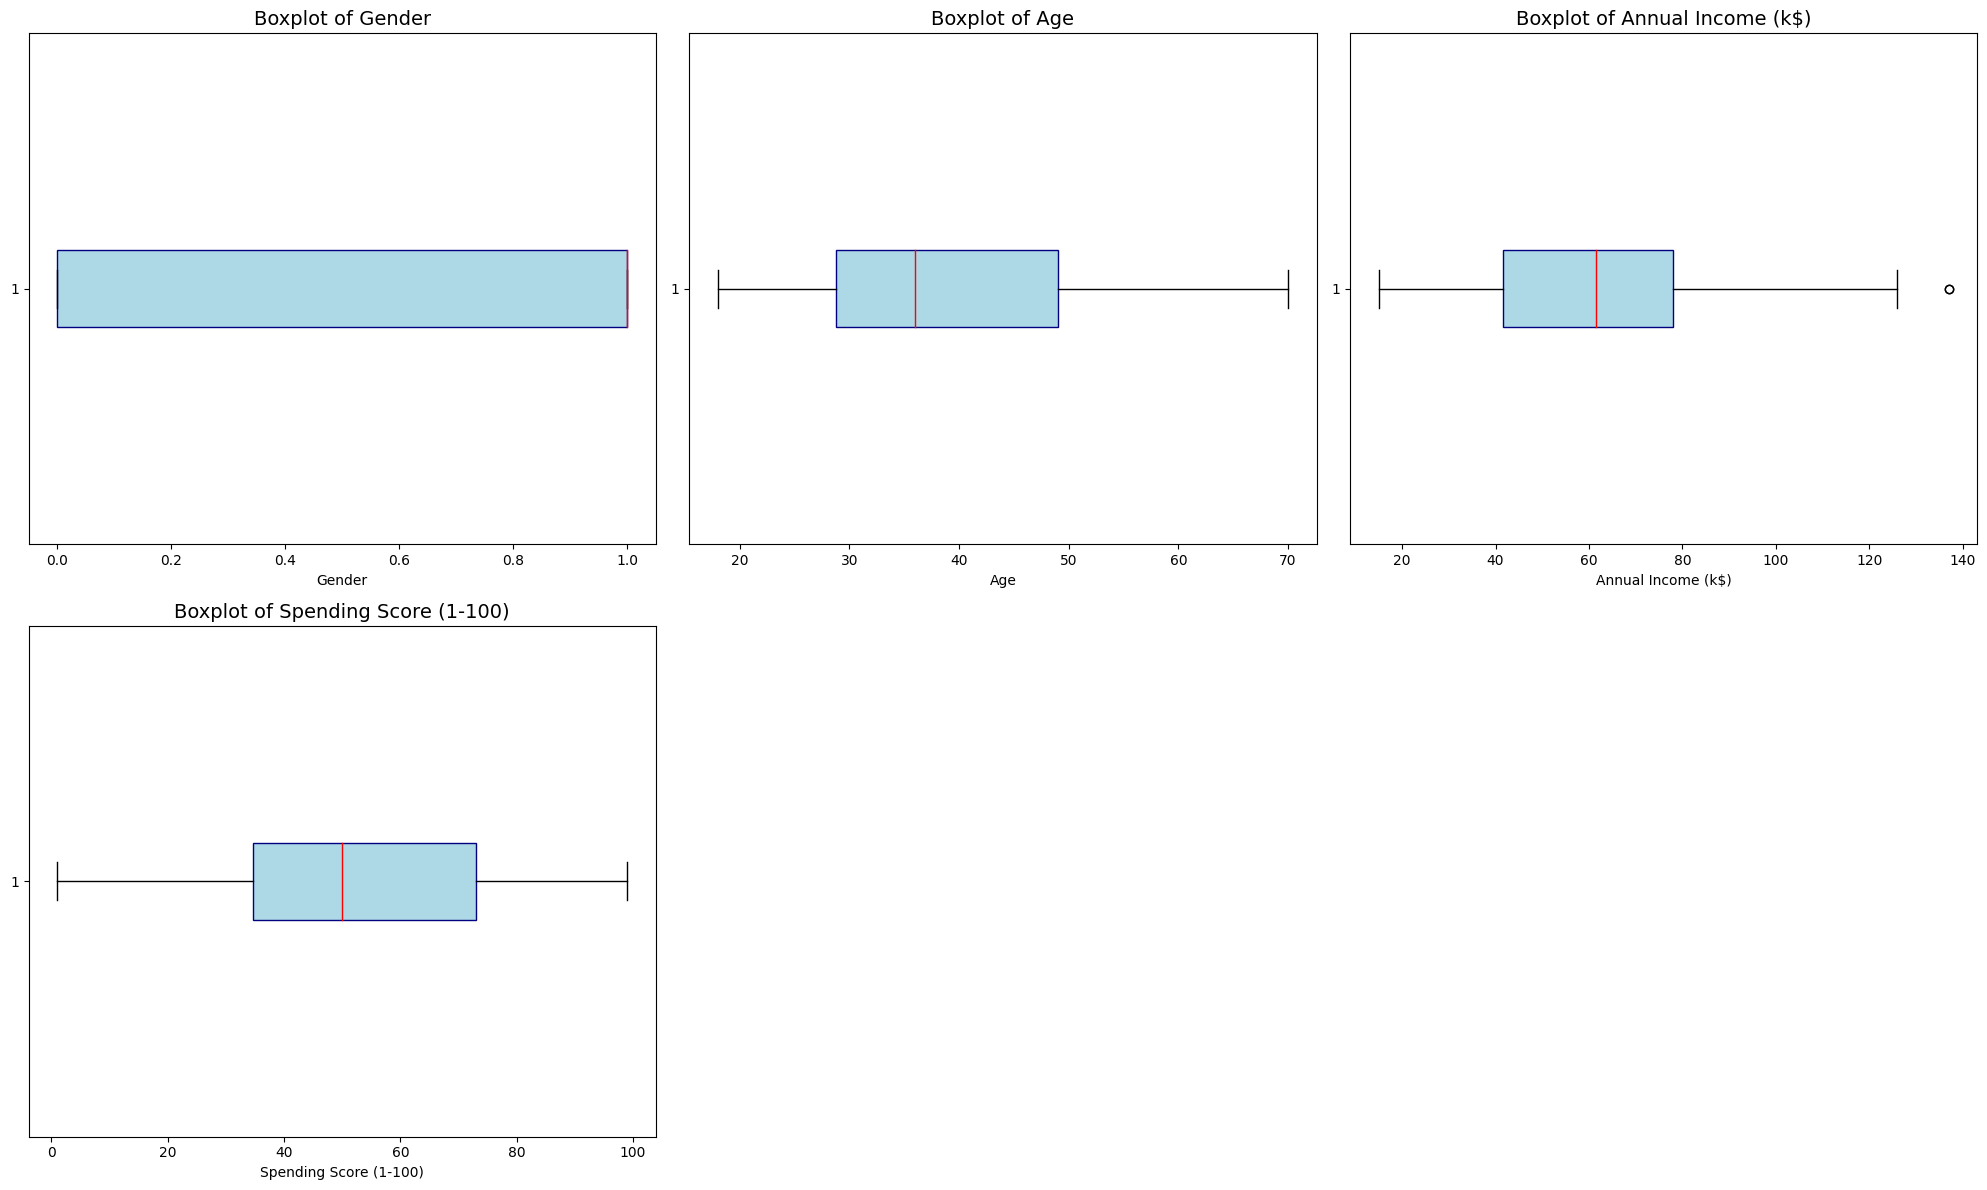

In [451]:
def plot_boxplots_alternative(df):
    num_columns = df.select_dtypes(include='number').columns
    num_features = len(num_columns)
    rows = (num_features // 3) + 1
    cols = min(num_features, 3)
    fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 6))
    axes = axes.flatten()  # Flatten in case of more subplots
    
    for i, col in enumerate(num_columns):
        axes[i].boxplot(df[col], vert=False, patch_artist=True,
                        boxprops=dict(facecolor='lightblue', color='navy'),
                        medianprops=dict(color='red'))
        axes[i].set_title(f'Boxplot of {col}', fontsize=14)
        axes[i].set_xlabel(col)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

plot_boxplots_alternative(df)

### Kernel Density Estimation (KDE) Plot
to see the distribution

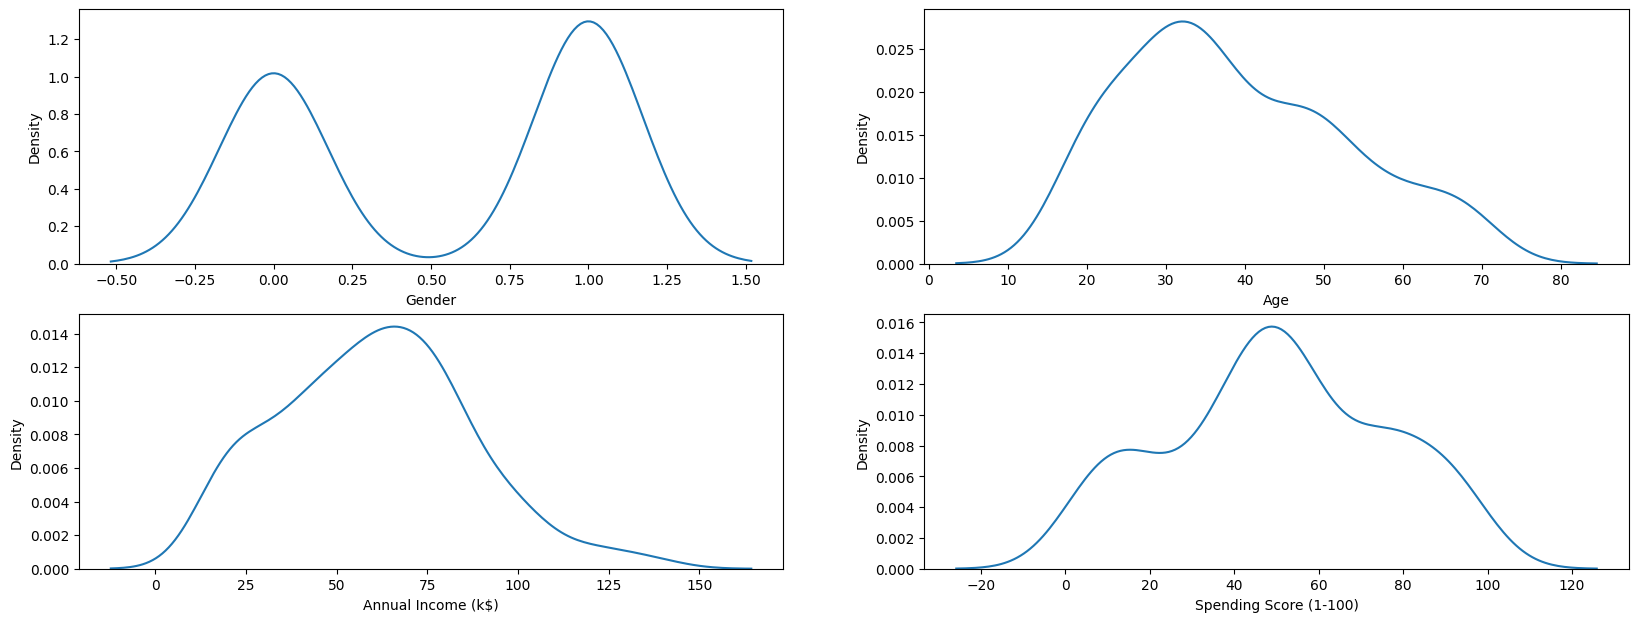

In [452]:
plt.figure(figsize=(20,35))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

### Scale dataset 

In [453]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

### Apply Elbow Method 

The "elbow" in the plot indicates the optimal number of clusters, which is where the inertia starts decreasing more slowly.

- Calculate Inertia (sum of squared distances to centroids).
- Plot the Elbow Curve to visualize the optimal number of clusters.

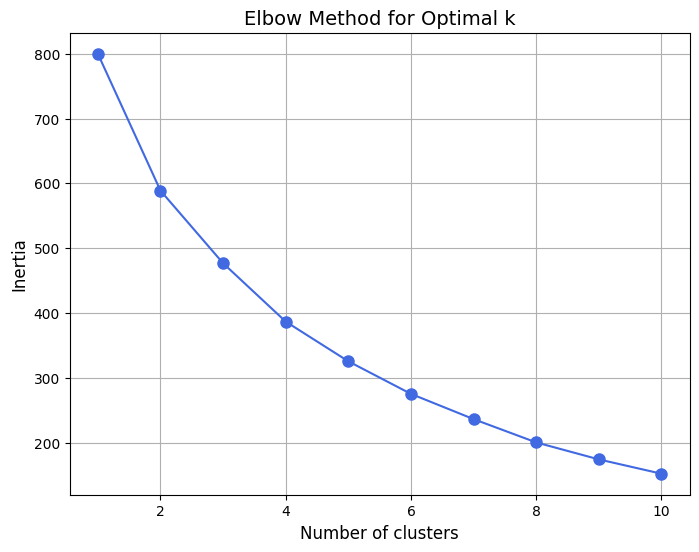

In [454]:
from sklearn.cluster import KMeans
def plot_elbow_method(scaled_data):
    inertia = [KMeans(n_clusters=k, random_state=0).fit(scaled_data).inertia_ for k in range(1, 11)]
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, 11), inertia, 'bo-', markersize=8, color='royalblue')
    plt.xlabel('Number of clusters', fontsize=12)
    plt.ylabel('Inertia', fontsize=12)
    plt.title('Elbow Method for Optimal k', fontsize=14)
    plt.grid(True)
    plt.show()

plot_elbow_method(scaled_data)

#### intertia values 

In [455]:
# show the intertia values 
cost = []
for k in range(2, 15):
    #Initialize KMeans with the selected number of K and  apply model fit 
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(scaled_data)
    cost.append([k,kmeanModel.inertia_])

In [456]:
cost

[[2, 588.8026767824936],
 [3, 476.78755441351586],
 [4, 386.71478577406873],
 [5, 325.4485704854348],
 [6, 275.19500469394814],
 [7, 236.25761095237866],
 [8, 200.3138821716555],
 [9, 174.1249392159928],
 [10, 152.02983429775685],
 [11, 137.17265166335827],
 [12, 127.86560025606872],
 [13, 114.52038092919223],
 [14, 106.99872070690608]]

we find K = 4 mean three cluster 

### Apply K-means Algorithms 

In [457]:
#define the number of cluster 
optimal_k = 4

#Initialize KMeans with the selected number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=0, max_iter=500)
#model fit
clusters = kmeans.fit_predict(scaled_data)

#After running this code, cluster_labels will contain an array with integers 
#representing the cluster each data point belongs to

####  add cluster labels in dataset 

In [458]:
df_finalresult = pd.DataFrame(df)
df_finalresult['kmeans_cluster'] = clusters
df_finalresult

,Gender,Age,Annual Income (k$),Spending Score (1-100),kmeans_cluster
0,0,19,15,39,0
1,0,21,15,81,0
2,1,20,16,6,1
3,1,23,16,77,2
4,1,31,17,40,2
...,...,...,...,...,...
195,1,35,120,79,2
196,1,45,126,28,1
197,0,32,126,74,0
198,0,32,137,18,3


To visualize the results of K-Means clustering without applying PCA, you can use the original features from your dataset directly. Assuming you have a dataset with multiple features, you might want to visualize it using just two dimensions, typically by selecting two of the original features .

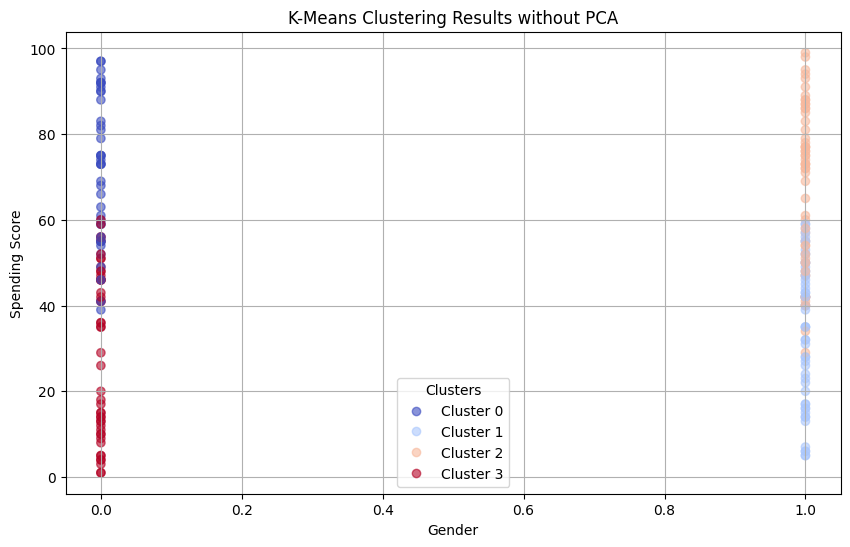

In [459]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_finalresult['Gender'], df_finalresult['Spending Score (1-100)'], c=clusters, cmap='coolwarm', alpha=0.6)
plt.xlabel('Gender')
plt.ylabel('Spending Score')
plt.title('K-Means Clustering Results without PCA')

legend_labels = [f'Cluster {i}' for i in range(optimal_k)]
handles, _ = scatter.legend_elements()
plt.legend(handles, legend_labels, title="Clusters")
plt.grid()
plt.show()

####  Apply PCA on scaled data

In [460]:
#df_finalresult.columns

In [461]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

#### K-Means Clustering Results with PCA

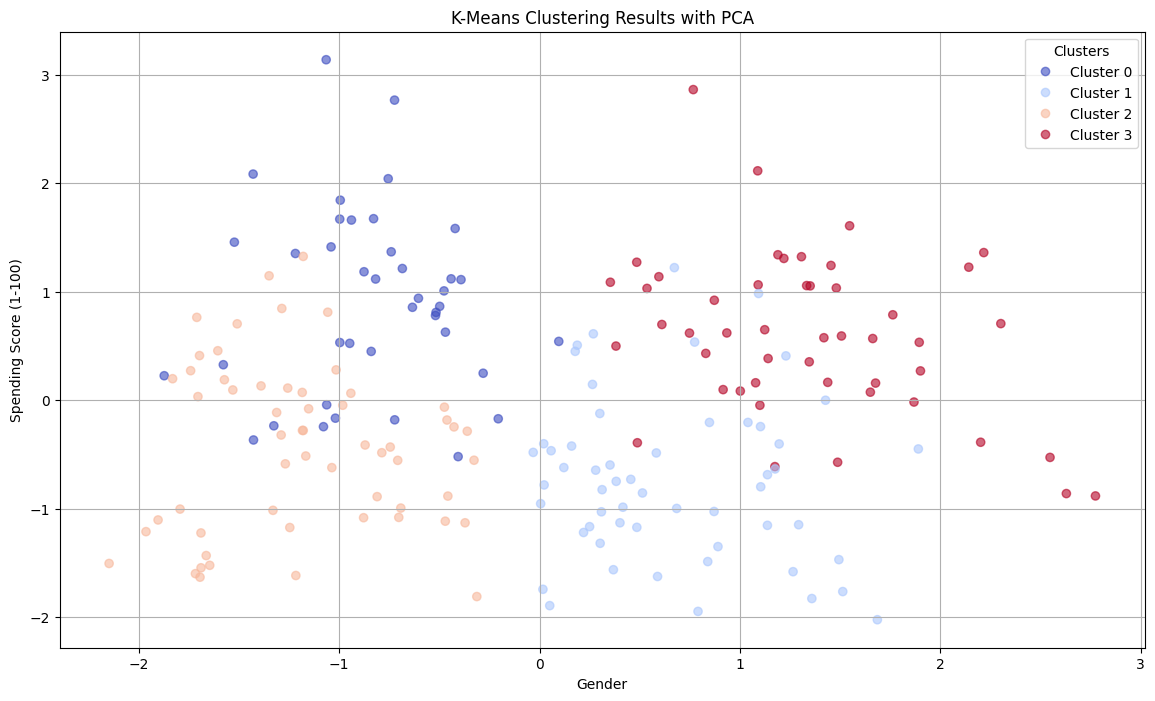

In [462]:
plt.figure(figsize=(14, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='coolwarm', alpha=0.6)
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering Results with PCA')
legend_labels = [f'Cluster {i}' for i in range(optimal_k)]
handles, _ = scatter.legend_elements()
plt.legend(handles, legend_labels, title="Clusters")
plt.grid()
plt.show()

#### Compute the silhouette score

In [463]:
# Compute the average silhouette score

# scaled_data  = dataset or features 
# clusters     = after fit make cluster lables
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(scaled_data,clusters)
print(f"the average silhouette score is: {silhouette_avg}")

the average silhouette score is: 0.3016237438985174


#### changing value of k then apply kmean and compute silhouette score

In [464]:
#add plot
s_score = []
# K = number of cluster 
# range(,) = range of cluster measn 1 to 10 value of K 

for k in range(2, 15):
    #Initialize KMeans with the selected number of K and  apply model fit 
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_data)
    #compute silhouette score
    s_score.append([k, silhouette_score(scaled_data, kmeans.labels_)])

In [465]:
s_score

[[2, 0.25181529157884364],
 [3, 0.25951265087431563],
 [4, 0.3016237438985174],
 [5, 0.31580529549543246],
 [6, 0.32367496231221066],
 [7, 0.3575533042931317],
 [8, 0.3876133626408243],
 [9, 0.4025192944683836],
 [10, 0.42076374869477745],
 [11, 0.42998269513575094],
 [12, 0.420798368470747],
 [13, 0.42865530740581115],
 [14, 0.4214707759436621]]

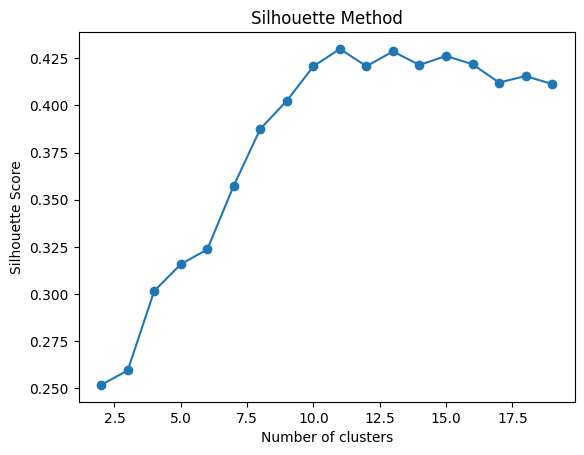

In [466]:
silhouette_scores = []
K = range(1, 20)
for k in K[1:]:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(score)

    
plt.plot(K[1:], silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

The best Silhouette score is achieved when K = 9 

## Hierarchical Clustering 

In [467]:
import scipy.cluster.hierarchy as hierarchy 

In [468]:
Z = hierarchy.linkage(scaled_data, 'complete')

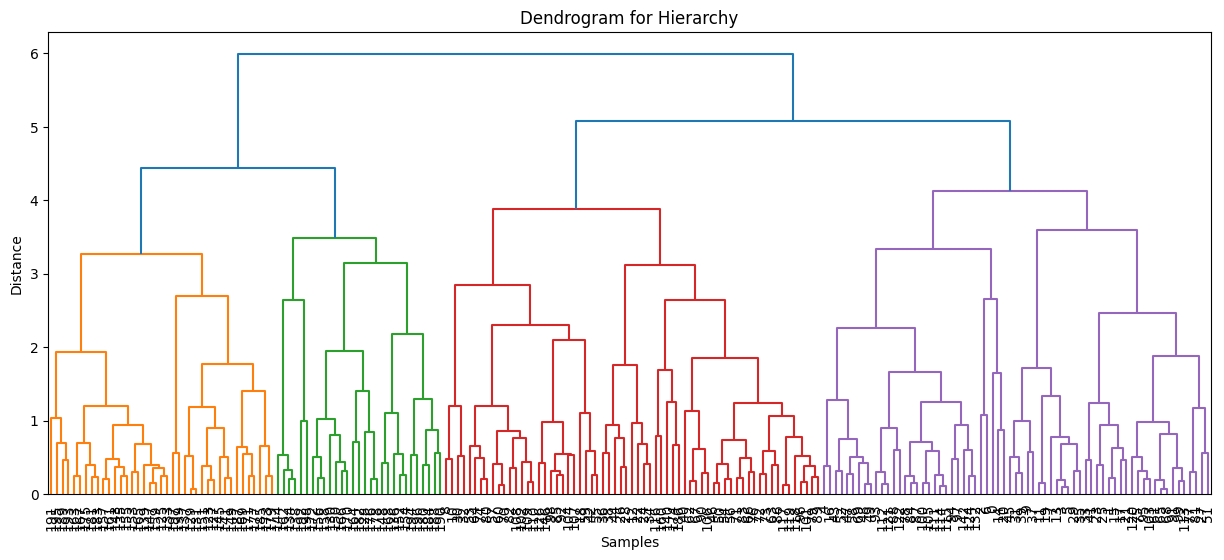

In [469]:
# Plot with Custom leaves
plt.figure(figsize=(15,6))
hierarchy.dendrogram(Z, leaf_rotation=90, leaf_font_size=10, labels=df.index)
plt.title('Dendrogram for Hierarchy')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

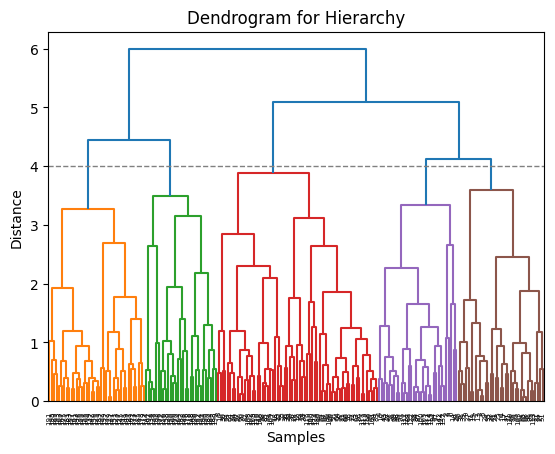

In [470]:
# Control number of clusters in the plot + add horizontal line.
hierarchy.dendrogram(Z, color_threshold=4,labels=df.index,leaf_rotation=90)
plt.axhline(y=4, c='grey', lw=1, linestyle='dashed')
plt.title('Dendrogram for Hierarchy')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

#### AgglomerativeClustering

In [471]:
from sklearn.cluster import AgglomerativeClustering

In [472]:
#Write the code to create an instance of AgglomerativeClustering with the appropriate parameters
complete = AgglomerativeClustering(n_clusters=4, linkage="complete")

#Fit & predict
# # Write a code to make AgglomerativeClustering fit the dataset and predict the cluster labels
complete_label = complete.fit_predict(scaled_data)

#### add Hierarchical cluster labes into dataset 

In [473]:
df_finalresult = pd.DataFrame(df_finalresult)
df_finalresult['Hierarchical cluster'] = complete_label

In [474]:
df_finalresult

,Gender,Age,Annual Income (k$),Spending Score (1-100),kmeans_cluster,Hierarchical cluster
0,0,19,15,39,0,0
1,0,21,15,81,0,0
2,1,20,16,6,1,0
3,1,23,16,77,2,0
4,1,31,17,40,2,0
...,...,...,...,...,...,...
195,1,35,120,79,2,3
196,1,45,126,28,1,1
197,0,32,126,74,0,3
198,0,32,137,18,3,1


In [475]:
complete_label

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 3, 0, 3, 2, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 2, 3, 0, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

#### Agglomerative or hierarchical Clustering Results with PCA

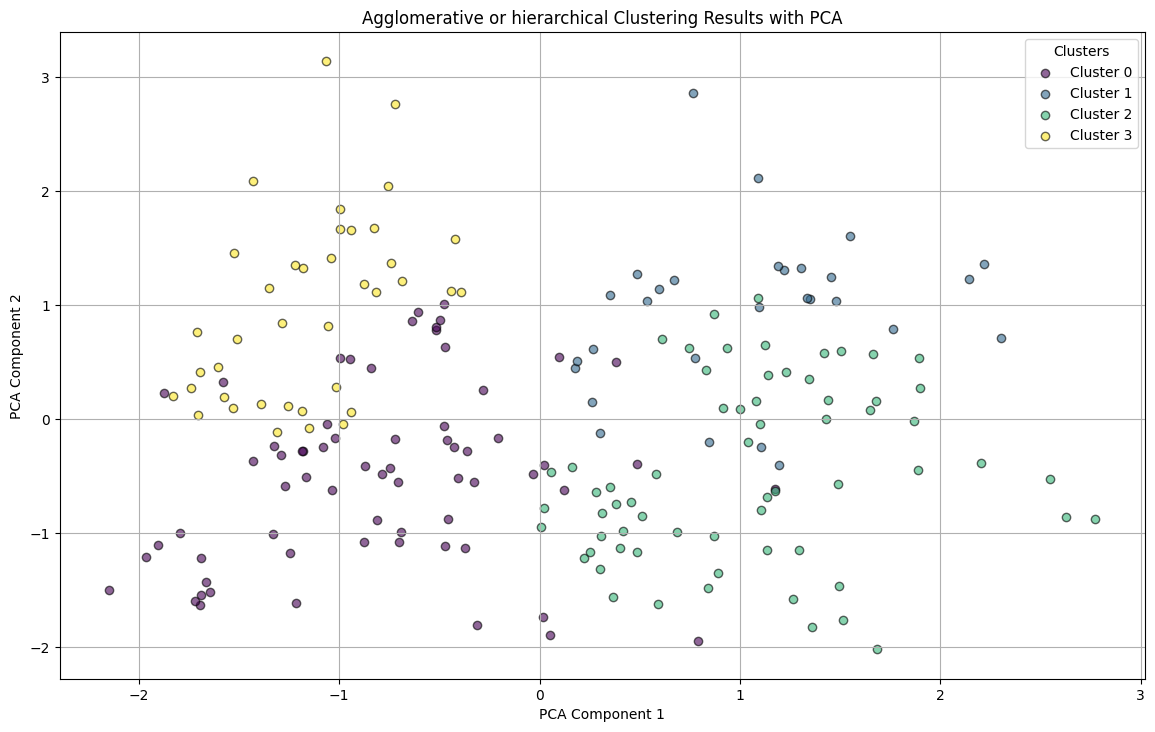

In [476]:
# Determine the number of unique labels (clusters + outliers)
unique_labels = set(complete_label)

# Set the figure size dynamically based on the number of unique clusters
# E.g., for small number of clusters, set a base size, and for more clusters, adjust accordingly
base_width = 10
base_height = 6
cluster_factor = 1 + (len(unique_labels) / 10)  # Adjust size factor based on cluster count
fig_width = base_width * cluster_factor
fig_height = base_height * cluster_factor

# Initialize figure with dynamic figsize
plt.figure(figsize=(fig_width, fig_height))

# Create a color map where -1 (outliers) will have a distinct color
colors = plt.cm.get_cmap('viridis', len(unique_labels))

# Plot each cluster with its unique color, and outliers with black color
for label in unique_labels:
    if label == -1:
        # Outliers: Color them Red
        color = [1, 0, 0, 1]  # Red
        label_name = "Outliers"
    else:
        # Assign unique color to each cluster
        color = colors(label / max(complete_label))
        label_name = f"Cluster {label}"
    
    # Plot the points belonging to each cluster
    plt.scatter(
        pca_result[complete_label == label, 0], 
        pca_result[complete_label == label, 1], 
        c=[color], label=label_name, edgecolor='k', alpha=0.6
    )

# Add labels and title
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Agglomerative or hierarchical Clustering Results with PCA')
plt.legend(title="Clusters")
plt.grid()

# Show the plot
plt.show()

#### Compute the average silhouette score

In [477]:
# Compute the average silhouette score

# scaled_data  = dataset or features 
# complete_pred     = after fit make cluster lables
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(scaled_data,complete_label)
print(f"the average silhouette score is: {silhouette_avg}")

the average silhouette score is: 0.265149160687069


In [478]:
#add plot
s_score = []
# K = number of cluster 
# range(,) = range of cluster measn 1 to 10 value of K 

for k in range(2, 15):
    #Initialize KMeans with the selected number of K and  apply model fit 
    complete_pred = AgglomerativeClustering(n_clusters=k, linkage="complete")
    complete_pred.fit_predict(scaled_data)
    #compute silhouette score
    s_score.append([k, silhouette_score(scaled_data,complete_pred.labels_)])


In [479]:
s_score

[[2, 0.1725985607018346],
 [3, 0.20792835320796477],
 [4, 0.265149160687069],
 [5, 0.24330923091806697],
 [6, 0.2838903216440338],
 [7, 0.30499077647719214],
 [8, 0.2988091182930526],
 [9, 0.2979504366374553],
 [10, 0.3526439220768313],
 [11, 0.37543417275151525],
 [12, 0.384259250105673],
 [13, 0.3935501100951078],
 [14, 0.39430351725689405]]

### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

In [480]:
from sklearn.cluster import DBSCAN

In [481]:
eps = 0.5
min_samples = 3


In [482]:
# DBSCAN
#metric='manhattan'
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_label = dbscan.fit_predict(scaled_data)

In [483]:
dbscan_label

array([-1,  1, -1,  0,  2,  0, -1, -1, -1,  0, -1, -1,  3,  0, -1,  1,  2,
        1, -1, -1, -1,  1, -1,  1,  3,  1,  2, -1,  2,  0, -1,  0, -1, -1,
        3,  0, -1, -1,  2,  0, -1, -1,  6,  5, -1,  0,  4,  5,  5,  5,  4,
       -1,  5,  6,  4,  6,  4,  6,  5,  6,  6,  7,  8,  4,  6,  7,  4,  8,
        7,  5,  6,  4,  4,  4,  6,  9,  4, -1,  5,  4,  6, -1,  6,  4,  5,
        6,  4,  5, -1,  4,  8,  9,  6,  5,  5,  9,  4,  5,  6,  9,  5,  4,
        6,  9,  6,  5,  8,  6,  6,  6,  6,  5,  5,  9,  5,  5,  8,  4,  4,
        4,  9,  5, -1, 10,  5, 11, -1, 10, -1, 12, -1, 12,  5, 11, 13, 11,
       15, 12, 13, 11, -1, 10,  5, 11, 13, 10, -1, 11, 16, 10, 14, 10, 15,
       11, 15, 11, 14, 11, 14, 11, -1, 11, 13, 11, -1, 11, 14, 11, 16, 17,
       14, 17, 14, 10, -1, 11, -1, 17, -1, 10, 16, 11, -1, 11, 16, -1, -1,
       -1, -1, 11, 16, -1, -1, 11, -1, -1, -1, -1, -1, -1])

#### total number of clusters without noise 

In [484]:
# Get unique labels without the noise (-1)
unique_labels = set(dbscan_label) - {-1}
counts = len(unique_labels)
# Display the unique values and their counts
print("Unique Values:", unique_values)
print("Counts:", counts)

Unique Values: [39 81  6 77 40 76 94  3 72 14 99 15 13 79 35 66 29 98 73  5 82 32 61 31
 87  4 92 17 26 75 36 28 65 55 47 42 52 60 54 45 41 50 46 51 56 59 48 49
 53 44 57 58 43 91 95 11  9 34 71 88  7 10 93 12 97 74 22 90 20 16 89  1
 78 83 27 63 86 69 24 68 85 23  8 18]
Counts: 18


#### Total number of noise points or outlier 

In [485]:
#count of noise points
n_noise_ = list(dbscan_label).count(-1)  # Count noise points
print(f"Estimated number of noise points: {n_noise_}")

Estimated number of noise points: 49


#### add dbscan cluster label into dataset 

In [486]:
df_finalresult = pd.DataFrame(df_finalresult)
df_finalresult['dbscan_cluster'] = dbscan_label

In [487]:
df_finalresult

,Gender,Age,Annual Income (k$),Spending Score (1-100),kmeans_cluster,Hierarchical cluster,dbscan_cluster
0,0,19,15,39,0,0,-1
1,0,21,15,81,0,0,1
2,1,20,16,6,1,0,-1
3,1,23,16,77,2,0,0
4,1,31,17,40,2,0,2
...,...,...,...,...,...,...,...
195,1,35,120,79,2,3,-1
196,1,45,126,28,1,1,-1
197,0,32,126,74,0,3,-1
198,0,32,137,18,3,1,-1


#### Compute the average silhouette score


In [488]:
# Compute the average silhouette score

# scaled_data  = dataset or features 
# dbscan_labels = after fit make cluster lables
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(scaled_data,dbscan_label)
print(f"the average silhouette score is: {silhouette_avg}")

the average silhouette score is: 0.21460367830515814


### DBSCAN Clustering Results with PCA

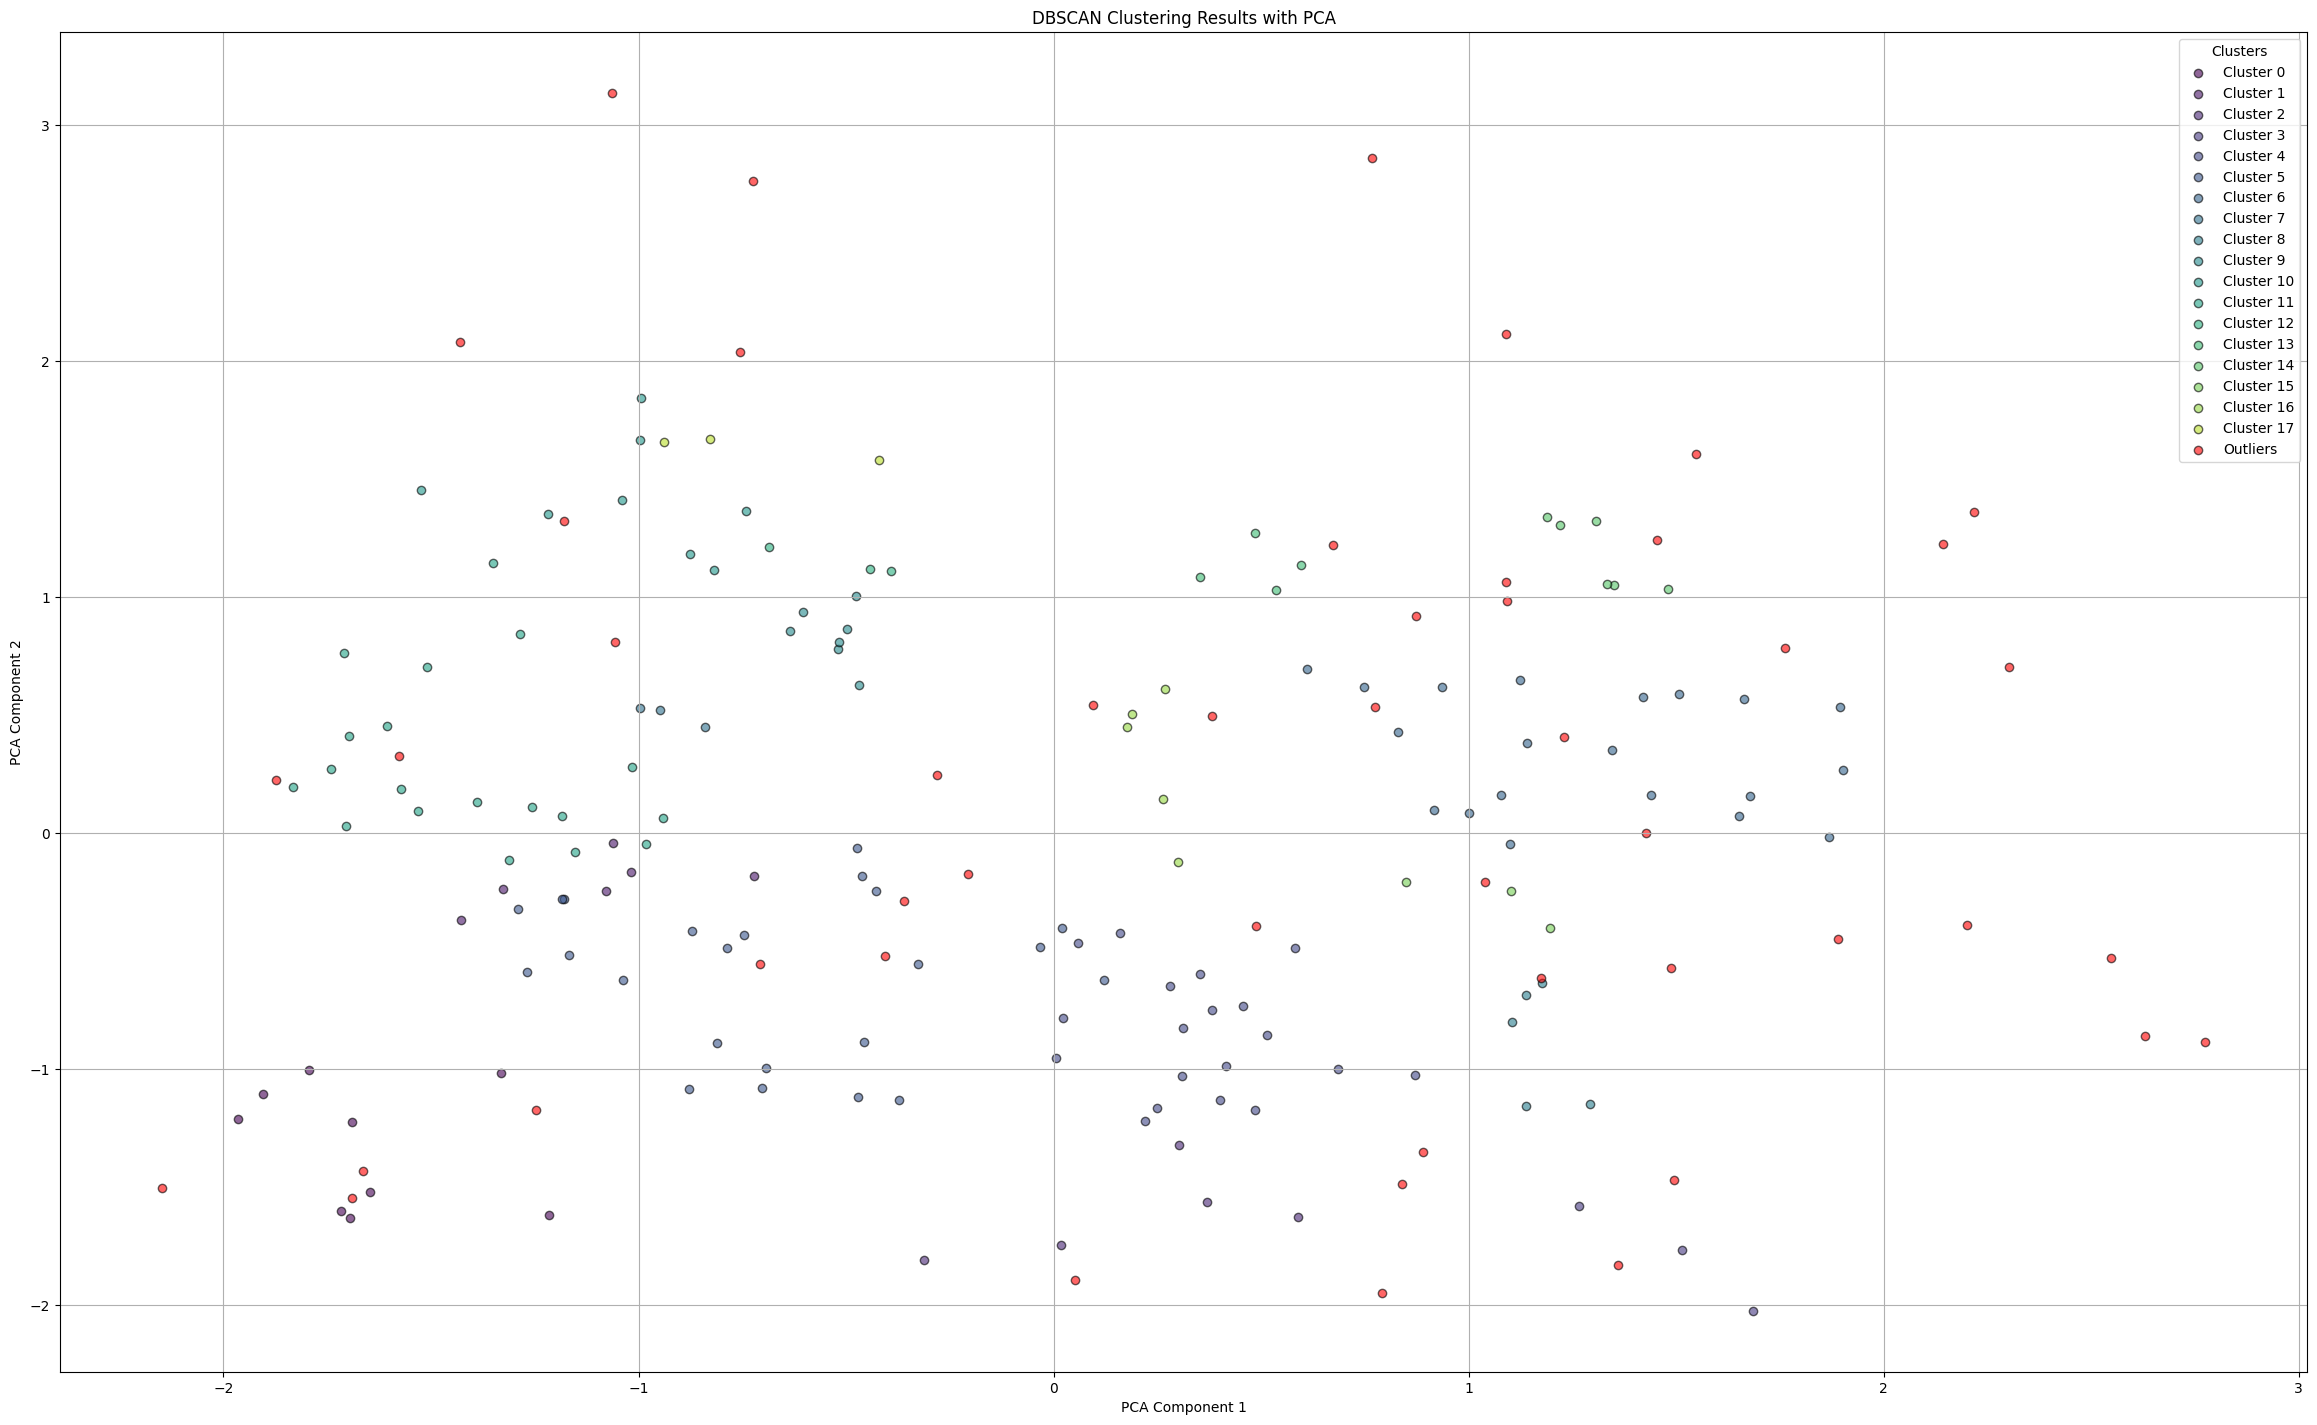

In [489]:
# Determine the number of unique labels (clusters + outliers)
unique_labels = set(dbscan_label)

# Set the figure size dynamically based on the number of unique clusters
base_width = 10
base_height = 6
cluster_factor = 1 + (len(unique_labels) / 10)  # Adjust size factor based on cluster count
fig_width = base_width * cluster_factor
fig_height = base_height * cluster_factor

# Initialize figure with dynamic figsize
plt.figure(figsize=(fig_width, fig_height))

# Create a color map where -1 (outliers) will have a distinct color
colors = plt.cm.get_cmap('viridis', len(unique_labels) + 1)  # +1 for outliers

# Plot each cluster with its unique color, and outliers with a distinct color
for label in unique_labels:
    if label == -1:
        # Outliers: Color them Red
        color = [1, 0, 0, 1]  # Red for outliers
        label_name = "Outliers"
    else:
        # Assign unique color to each cluster
        color = colors(label / len(unique_labels))
        label_name = f"Cluster {label}"
    
    # Plot the points belonging to each cluster
    plt.scatter(
        pca_result[dbscan_label == label, 0], 
        pca_result[dbscan_label == label, 1], 
        c=[color], label=label_name, edgecolor='k', alpha=0.6
    )

# Add labels and title
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Clustering Results with PCA')
plt.legend(title="Clusters")
plt.grid()

# Show the plot
plt.show()

#### Evaluating DBSCAN with Varying Parameters and Plotting Silhouette Scores

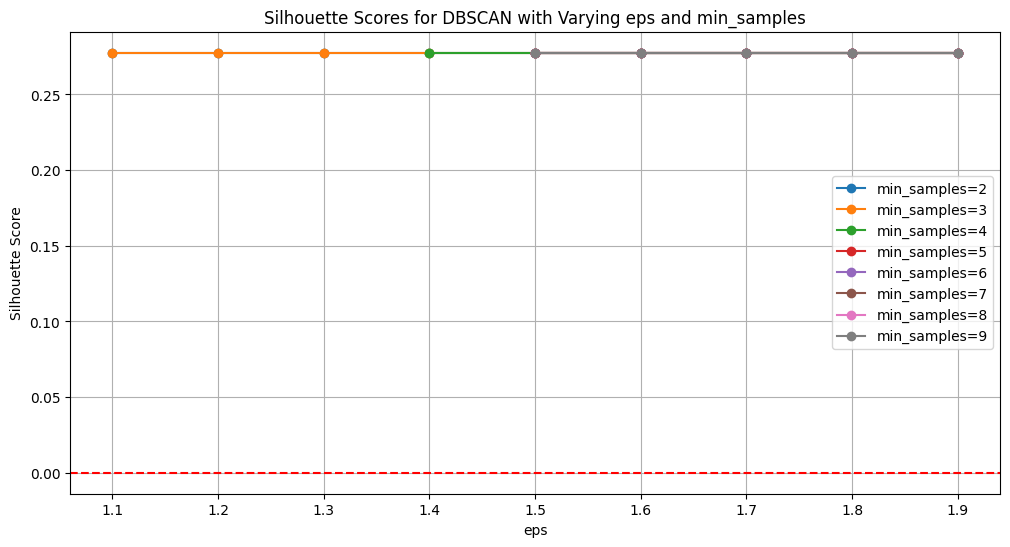

In [490]:
# List to hold silhouette scores
s_scores = []

# Define the range for eps and min_samples
eps_values = np.arange(0.1, 2.0, 0.1)  # Range from 0.5 to 1.5 with step 0.5
min_samples_values = range(2, 10)  # from 2 to 9

# Iterate through different values of eps and min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        # Initialize and fit DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(scaled_data)

        # Only calculate silhouette score if there is more than one cluster
        if len(set(dbscan_labels)) > 1 and -1 not in dbscan_labels:  # Exclude noise (-1)
            score = silhouette_score(scaled_data, dbscan_labels)
            # Append as a list to ensure s_scores becomes 2D
            s_scores.append([eps, min_samples, score])

# Convert to numpy array for easier manipulation
s_scores = np.array(s_scores)

# Check if the array is not empty before plotting
if s_scores.size > 0:
    # Plotting the results
    plt.figure(figsize=(12, 6))

    # Create a scatter plot of silhouette scores
    for min_samples in min_samples_values:
        # Filter the scores based on the min_samples
        mask = s_scores[:, 1] == min_samples
        plt.plot(s_scores[mask, 0], s_scores[mask, 2], marker='o', label=f'min_samples={min_samples}')

    plt.title('Silhouette Scores for DBSCAN with Varying eps and min_samples')
    plt.xlabel('eps')
    plt.ylabel('Silhouette Score')
    plt.axhline(y=0, color='r', linestyle='--')  # Horizontal line at y=0
    plt.legend()
    plt.grid()
    plt.show()
else:
    print("No valid silhouette scores were calculated.")


#### comperison Kmean Model , hierarchical Model , DBSCAN Model with respect Silhouette Score

In [491]:
kmeans_silhouette = silhouette_score(scaled_data, clusters)
hierarchical_silhouette = silhouette_score(scaled_data,complete_label)
dbscan_silhouette = silhouette_score(scaled_data, dbscan_label)

print("Silhouette Score:")
print("K-means Silhouette Score:", kmeans_silhouette)
print("Hierarchical Silhouette Score:", hierarchical_silhouette)
print("DBScan Silhouette Score:", dbscan_silhouette)

Silhouette Score:
K-means Silhouette Score: 0.3016237438985174
Hierarchical Silhouette Score: 0.265149160687069
DBScan Silhouette Score: 0.21460367830515814


Silhouette Score Interpretation:

- A score near +1 indicates that samples are far away from neighboring clusters.
- A score near 0 indicates overlapping clusters.
- A score near -1 indicates that samples are misclassified.

Improving the Silhouette Score in clustering algorithms such as K-Means, Hierarchical Clustering, and DBSCAN often involves fine-tuning parameters, preprocessing the dataset, or adjusting the algorithm's settings.

### Identify and extract the outlier rows (those labeled as noise by DBSCAN)

In [492]:
df_finalresult

,Gender,Age,Annual Income (k$),Spending Score (1-100),kmeans_cluster,Hierarchical cluster,dbscan_cluster
0,0,19,15,39,0,0,-1
1,0,21,15,81,0,0,1
2,1,20,16,6,1,0,-1
3,1,23,16,77,2,0,0
4,1,31,17,40,2,0,2
...,...,...,...,...,...,...,...
195,1,35,120,79,2,3,-1
196,1,45,126,28,1,1,-1
197,0,32,126,74,0,3,-1
198,0,32,137,18,3,1,-1


In [493]:
# Identify outliers (labeled as -1)
outliers = df_finalresult[dbscan_label == -1]

In [494]:
outliers

,Gender,Age,Annual Income (k$),Spending Score (1-100),kmeans_cluster,Hierarchical cluster,dbscan_cluster
0,0,19,15,39,0,0,-1
2,1,20,16,6,1,0,-1
6,1,35,18,6,1,0,-1
7,1,23,18,94,2,0,-1
8,0,64,19,3,3,2,-1
10,0,67,19,14,3,2,-1
11,1,35,19,99,2,0,-1
14,0,37,20,13,3,0,-1
18,0,52,23,29,3,2,-1
19,1,35,23,98,2,0,-1


#### General Steps to Improve Silhouette Score

Feature Scaling:

Use StandardScaler or MinMaxScaler from sklearn.preprocessing to normalize your dataset. Many clustering algorithms are sensitive to feature scaling, and improving this can lead to better cluster formation.


Dimensionality Reduction:

If your dataset is high-dimensional (5 features here), applying PCA (Principal Component Analysis) to reduce noise and capture the most important features may help improve clustering performance

Outlier Detection:

Outliers can skew clustering results. Detect and remove outliers before clustering. For example, use z-score or IQR (Interquartile Range) to identify outliers

Feature Selection:

Not all features may contribute meaningfully to cluster formation. You can apply feature selection methods (e.g., variance thresholding, correlation analysis) to remove redundant or irrelevant features.